# ERT (Electrical Resistivity Tomography) 

- Emmanuel Castillo & Nadine Ushakov
- emmanuel.castillotaborda@utallas.edu & nadine.igonin@utdallas.edu

# Installation

In [ ]:
!apt-get update
!apt-get install -y \
    build-essential \
    libopenblas-dev \
    libsuitesparse-dev \
    libboost-all-dev \
    cmake \
    python3-dev
!pip uninstall -y \
  numpy numba pytensor jax jaxlib tensorflow spacy pymc librosa \
  dask-cuda umap-learn pynndescent cudf-cu12 stumpy shap \
  tensorflow-decision-forests chex cuml-cu12 dopamine-rl \
  orbax-checkpoint optax flax dask-cudf-cu12 raft-dask-cu12 tsfresh
!pip install --no-deps pgcore==1.5.0
!pip install numpy==1.26.4
!pip install --no-deps pygimli==1.5.4
import os
os._exit(00)

## First test
Be sure to have libcholmod.so.3 or libumfpack.so.5. Otherwise you can create symbolic links as described here: https://github.com/gimli-org/gimli/issues/761#issuecomment-2315873346

In [ ]:
import os

# List of required shared libraries with full paths
required_libs = [
    "/usr/lib/x86_64-linux-gnu/libcholmod.so.3",
    "/usr/lib/x86_64-linux-gnu/libumfpack.so.5"
]

for lib in required_libs:
    assert os.path.exists(lib), f"Required library not found: {lib}"

print(f"All required shared libraries are present: {required_libs}")

## Second test

- expected_pygimli_version = "1.5.4"
- expected_numpy_version = "1.26.4"

In [ ]:
import pygimli
import numpy

expected_pygimli_version = "1.5.4"
expected_numpy_version = "1.26.4"

print("pyGIMLi version:", pygimli.__version__)
print("numpy version:", numpy.__version__)

assert pygimli.__version__ == expected_pygimli_version, f"Expected pyGIMLi {expected_pygimli_version} but got {pygimli.__version__}"
assert numpy.__version__ == expected_numpy_version, f"Expected numpy {expected_numpy_version} but got {numpy.__version__}"

...ready to work with pygimli!

# Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ert

# STG Data

In [7]:
print(help(ert.parse_stg))

Help on function parse_stg in module ert:

parse_stg(filepath, join_date_time=True)
    Read a .stg file exported from SuperSting and return a pandas DataFrame.
    
    Parameters:
        filepath (str): Path to the .stg file.
        join_date_time (bool): If True, combine date and time into a single datetime object in 'date_time' column.
    
    Returns:
        pd.DataFrame: Parsed .stg data.

None


In [8]:

stg_filepath = "../data/ROC_ERT_032625/ROC2025.stg"

# Load the STG file
stg = ert.parse_stg(stg_filepath)
print(stg.head())
print(stg.columns)
stg.to_csv("stg.csv", index=False)

   record_num  user           date_time       V/I  error_percent_tenths  \
0           1  USER 2025-03-26 10:07:56  0.564647                    19   
1           2  USER 2025-03-26 10:08:18  0.123888                    32   
2           3  USER 2025-03-26 10:08:40  0.052938                    50   
3           4  USER 2025-03-26 10:09:03  0.031073                    58   
4           5  USER 2025-03-26 10:09:25  0.011693                    19   

   current_mA  resistivity command_id   Ax   Ay  ...   Nz  ip_time_slot_ms  \
0         299      15.9650    ROC2025  1.5  0.0  ...  0.0              100   
1         301      14.0114    ROC2025  1.5  0.0  ...  0.0              100   
2         303      14.9679    ROC2025  1.5  0.0  ...  0.0              100   
3         304      17.5715    ROC2025  1.5  0.0  ...  0.0              100   
4         305      11.5712    ROC2025  1.5  0.0  ...  0.0              100   

   ip_time_constant  ip_slot1  ip_slot2  ip_slot3  ip_slot4  ip_slot5  \
0      

Review the summary. (Notice the values of Ay, Az,By,Bz,My, Mz)

In [9]:
stg[["current_mA","resistivity","Ax","Ay","Az","Bx","By","Bz","Mx","My","Mz","Nx","Ny","Nz"]].describe()

,current_mA,resistivity,Ax,Ay,Az,Bx,By,Bz,Mx,My,Mz,Nx,Ny,Nz
count,170.000000,170.000000,170.000000,170.0,170.0,170.000000,170.0,170.0,170.000000,170.0,170.0,170.000000,170.0,170.0
mean,349.052941,14.305113,7.641176,0.0,0.0,8.611765,0.0,0.0,13.305882,0.0,0.0,15.441176,0.0,0.0
std,34.393178,16.024277,4.543421,0.0,0.0,6.560315,0.0,0.0,4.657242,0.0,0.0,4.956564,0.0,0.0
min,262.000000,-94.752200,0.000000,0.0,0.0,0.000000,0.0,0.0,1.500000,0.0,0.0,3.000000,0.0,0.0
25%,321.000000,11.884000,4.500000,0.0,0.0,3.000000,0.0,0.0,10.500000,0.0,0.0,12.000000,0.0,0.0
50%,349.000000,14.579700,7.500000,0.0,0.0,7.500000,0.0,0.0,13.500000,0.0,0.0,16.500000,0.0,0.0
75%,370.000000,16.509450,10.500000,0.0,0.0,13.500000,0.0,0.0,16.500000,0.0,0.0,19.500000,0.0,0.0
max,452.000000,101.551000,19.500000,0.0,0.0,22.500000,0.0,0.0,21.000000,0.0,0.0,22.500000,0.0,0.0


let's check the resistivity. Negative values usually indicate: Instrumental error, bad or noisy data (e.g., poor electrode contact or external interference)

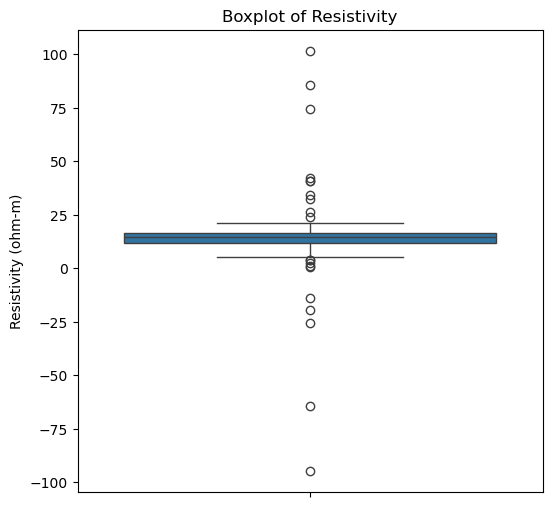

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.boxplot(y=stg['resistivity'].dropna())
plt.title("Boxplot of Resistivity")
plt.ylabel("Apparent Resistivity (ohm-m)")
plt.show()

# ERT Analysis